In [6]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv
from scipy.special import erf
from scipy.stats import gaussian_kde
import math
import random
from numpy import linalg as LA
from itertools import product
from utils import *
from plot import *
from copy import copy


# Test utils:

In [2]:
J_ans_3 = math.sqrt(3)/2
points0 = np.array([0, 0])
points1 = np.array([-0.5, math.sqrt(3)/2])
points2 = np.array([-1, 0])
J_3 = get_J([points0, points1, points2])
print(J_ans_3)
print(J_3)

0.8660254037844386
0.8660254037844386


In [3]:
# Checking Jacobian calculation for four links
# Also checking vectorization for determinant calculation

theta = np.arange(-np.pi, np.pi, np.pi/20)
theta_0 = np.ones(len(theta)) * np.pi/2

points1 = np.array([np.cos(theta_0 + theta), np.sin(theta_0 + theta)])
points2 = points1 + np.array([-1 * np.ones(len(theta)), np.zeros(len(theta))])
points3 = points2 + np.array([-np.cos(theta_0 + theta), -np.sin(theta_0 + theta)])
points = [points1, points2, points3]
J = np.abs(get_J(points))
J_ans = np.abs(np.cos(theta))

for ii in range(len(theta)):
    print("%f, %f" % (J[ii], J_ans[ii]))

1.000000, 1.000000
0.987688, 0.987688
0.951057, 0.951057
0.891007, 0.891007
0.809017, 0.809017
0.707107, 0.707107
0.587785, 0.587785
0.453990, 0.453990
0.309017, 0.309017
0.156434, 0.156434
0.000000, 0.000000
0.156434, 0.156434
0.309017, 0.309017
0.453990, 0.453990
0.587785, 0.587785
0.707107, 0.707107
0.809017, 0.809017
0.891007, 0.891007
0.951057, 0.951057
0.987688, 0.987688
1.000000, 1.000000
0.987688, 0.987688
0.951057, 0.951057
0.891007, 0.891007
0.809017, 0.809017
0.707107, 0.707107
0.587785, 0.587785
0.453990, 0.453990
0.309017, 0.309017
0.156434, 0.156434
0.000000, 0.000000
0.156434, 0.156434
0.309017, 0.309017
0.453990, 0.453990
0.587785, 0.587785
0.707107, 0.707107
0.809017, 0.809017
0.891007, 0.891007
0.951057, 0.951057
0.987688, 0.987688


In [4]:
# Check geometry formulas
print(get_triangles(0, 1, 1))
print(get_triangles(-0.2, 1, 1))
print(get_angle((0, 1), (-1, 1), (-1, 0)))
print(get_angle((np.array([0, 0]), np.array([1, 1])), \
               (np.array([-1, -1]), np.array([1, 1])), \
              (np.array([-1, -1]), np.array([0, 0]))))

[(array([-1.]), array([1.])), (array([0.]), array([0.]))]
[(array([-1.19979671]), array([0.97983737])), (array([-0.00020329]), array([0.02016263]))]
1.5707963267948966
[1.57079633 1.57079633]


## Ceff calculations

### Naive approach*

In [35]:
def numerical_ceff(sigma, theta_0, n_links, niter=1000000, L=1, \
    theta_thresh=0.01, x_thresh=0.01, y_thresh=0.01):
    theta_totals = np.zeros(niter)
    x_totals = np.zeros(niter)
    y_totals = np.zeros(niter)
    for ii in range(n_links):
        theta_vals = np.random.normal(loc=theta_0, scale=sigma, size=niter)
        theta_totals += theta_vals
        theta_totals %= 2 * np.pi
        x_totals += L * np.cos(theta_totals)
        y_totals += L * np.sin(theta_totals)
    
    x_pass = np.abs(x_totals) < x_thresh
    y_pass = np.abs(y_totals) < y_thresh
    theta_pass = np.abs(theta_totals) < theta_thresh
    prob = sum(x_pass * y_pass * theta_pass)/niter
    ceff = 2 * np.pi * prob/(np.pi * theta_thresh * x_thresh * y_thresh)
    return ceff

0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0


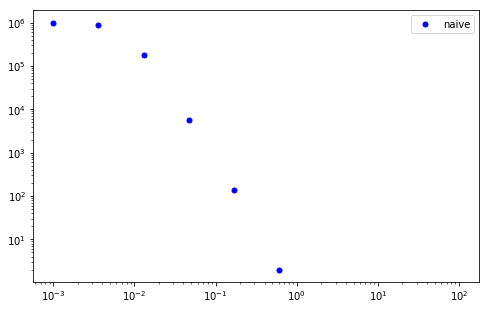

In [37]:
numerical_ceff_vals_3 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, 2 * np.pi/3, 3, 'naive')
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, [numerical_ceff_vals_3], ['naive'])

0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0


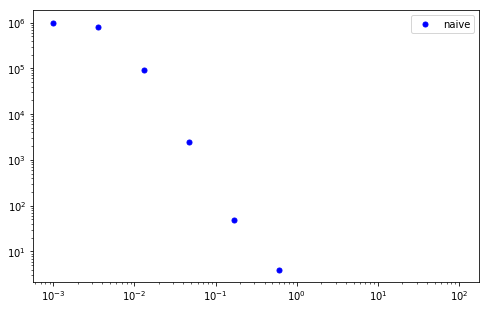

In [38]:
numerical_ceff_vals_4 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, np.pi/2, 4, 'naive')
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, [numerical_ceff_vals_4], ['naive'])

0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0


/usr/local/lib/python3.7/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


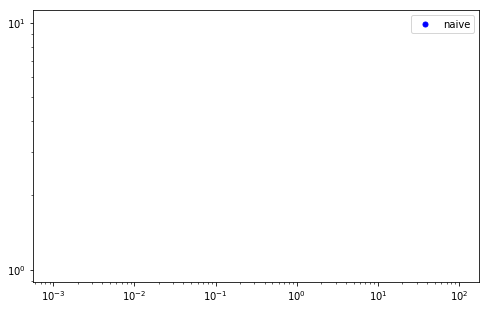

In [206]:
numerical_ceff_vals_4_0 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, 0, 4, 'naive')
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, [numerical_ceff_vals_4_0], ['naive'])

0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0


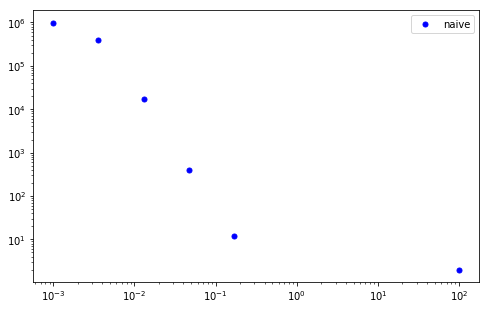

In [39]:
numerical_ceff_vals_7 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, 2 * np.pi/7, 7, 'naive')
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, [numerical_ceff_vals_7], ['naive'])

### Infinite sigma

In [40]:
def analytical_inf_sigma(n_links, k_min=0, k_max=100000, nbins=1000000, L=1):
    del_k = (k_max - k_min)/nbins
    k_vals = np.arange(k_min, k_max, del_k)
    ceff = 0
    for k in k_vals:
        ceff += k * (jv(0, k * L)**n_links) * del_k
    return ceff / (2 * np.pi) # Divide by 2 pi because this probability currently sums over all values of theta

0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0


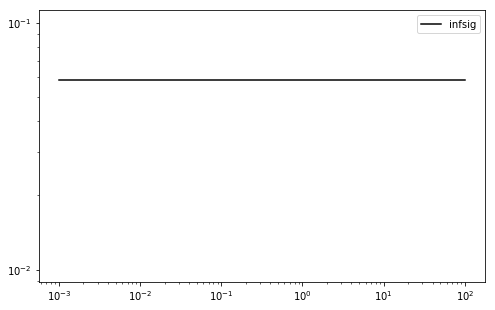

In [41]:
analytical_inf_vals_3 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, 2 * np.pi/3, 3, 'infsig')
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, [analytical_inf_vals_3], ['infsig'])

0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0


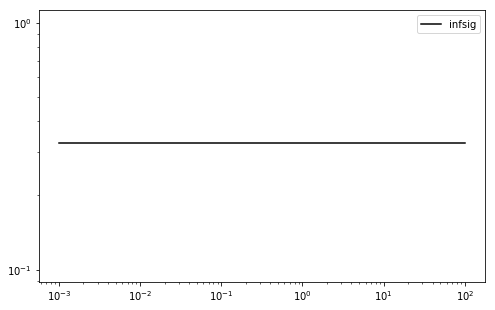

In [42]:
analytical_inf_vals_4 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, np.pi/2, 4, 'infsig')
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, [analytical_inf_vals_4], ['infsig'])

0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0


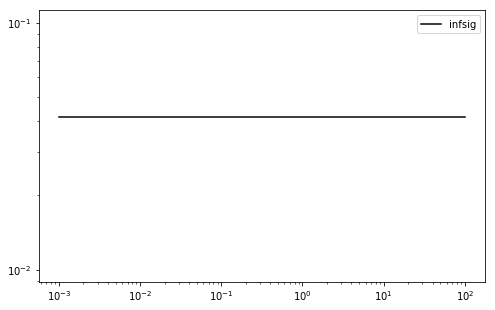

In [43]:
analytical_inf_vals_7 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, 2 * np.pi/7, 7, 'infsig')
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, [analytical_inf_vals_7], ['infsig'])

### Semi-analytical

In [44]:
def analytical_ceff_3(sigma):
    J = math.sqrt(3)/2
    ceff = 2 * np.pi * (eval_folded(sigma, 0)**3 + eval_folded(sigma, 2*np.pi/3)**3)/J
    return ceff

In [45]:
def old_analytical_ceff_4(sigma):
    theta_vals = np.arange(-np.pi, np.pi, np.pi/100)
    ceff = 0
    for theta in theta_vals:
        points0 = np.array([0, 0])
        points1 = np.array([math.cos(theta), math.sin(theta)])
        points2 = points1 + np.array([-1, 0])
        points3 = points2 + np.array([-math.cos(theta), -math.sin(theta)])
        points = [points0, points1, points2, points3]
        J = abs(get_J(points))
        ceff += (eval_folded(sigma, theta)**4) * 2 * np.pi/abs(np.cos(theta)) * np.pi/100 #J
    return ceff

In [129]:
def analytical_ceff_4(sigma):
    theta_vals = np.linspace(-np.pi, np.pi, 10000, endpoint=True)
    delta_theta = theta_vals[1] - theta_vals[0]
    folded_gauss_vals = eval_folded_grid(sigma, theta_vals)
    ceff = np.sum(folded_gauss_vals**4 * 2 * np.pi/np.abs(np.cos(theta_vals)) * delta_theta)
    return ceff

In [141]:
def analytical_ceff(sigma, theta_0, n_links=4, n_theta_points = 100, sanity_check=False, L=1, plot_paths=False):
    
    theta_vals = np.linspace(-np.pi+0.001, np.pi-0.001, n_theta_points, endpoint=True) #CHANGE
    d_theta = theta_vals[1] - theta_vals[0]
    
    if (n_links == 3):
        return analytical_ceff_3(sigma)
    
    if (n_links == 4 and sanity_check):
        return analytical_ceff_4(sigma)
    else:
        n_thetas_to_sample = int(n_links-3)
        ceff = 0
        for theta_iter in product(theta_vals, repeat = n_thetas_to_sample):
        
        # Get x, y positions from first_thetas
            points = get_coords_from_thetas(theta_iter, L)

            # Get closure solutions (there's 2)
            [(x1, y1), (x2, y2)] = get_triangles(points[-1][0], points[-1][1], L)

            for (x_n,y_n) in [(x1, y1), (x2, y2)]:
                # Get angles for probability calculation
                thetas = np.copy(theta_iter)
                thetas = np.append(thetas,
                            [np.pi - get_angle([points[-2][0], points[-2][1]], [points[-1][0], points[-1][1]], [x_n, y_n]),
                              np.pi - get_angle([points[-1][0], points[-1][1]], [x_n, y_n], [-L, 0]),
                              np.pi - get_angle([x_n, y_n], [-L, 0], [0, 0])])
                

                # Get Jacobian
                if not np.isnan(thetas).any():
                    if plot_paths:
                        pts_to_plot = copy(points)

                        pts_to_plot.extend([[x_n,y_n],[-L,0],[0,0]])
                        pts_to_plot = np.array(pts_to_plot)
                        plt.plot(pts_to_plot[:,0],pts_to_plot[:,1])

                    J = abs(get_J([[points[-1][0], points[-1][1]], [x_n, y_n], [-L, 0]]))
                    
                    ceff += 2 * np.pi * d_theta * np.prod(eval_folded_grid(sigma, thetas - theta_0)) / J
        return ceff

array([0.60105964])

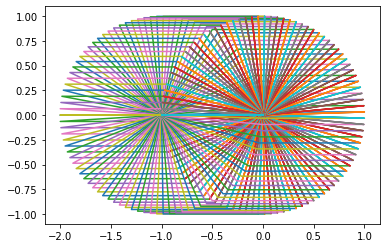

In [142]:
analytical_ceff(1, np.pi/2, n_links=4)

In [130]:
analytical_ceff(1, np.pi/2, n_links=4,sanity_check=True)

0.2739036905964715

0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0


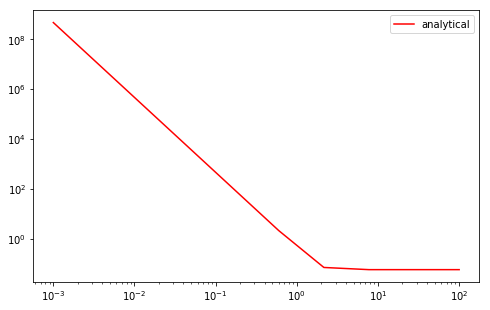

In [48]:
analytical_vals_3 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, 2 * np.pi/3, 3, 'analytical')
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, [analytical_vals_3], ['analytical'])

0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0


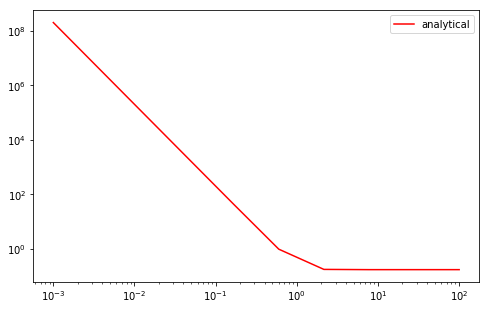

In [49]:
analytical_vals_4 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, np.pi/2, 4, 'analytical')
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, [analytical_vals_4], ['analytical'])

### Harmonic transform*

In [50]:
def compute_rhohat_mn(m, n, p, L, theta_0, sigma):
    return 1j**(n-m) * jv( m-n, p*L ) * np.exp(1j*n*theta_0 - (n*sigma)**2)

def compute_rhohat_matrix(p, L, theta_0, sigma, cutoff=10):
    rhohat_matrix = np.zeros([2*cutoff+1, 2*cutoff+1], dtype=complex)
    for i in range(rhohat_matrix.shape[0]):
        m = i - cutoff
        for j in range(rhohat_matrix.shape[1]):
            n = j - cutoff
            rhohat_matrix[i][j] = compute_rhohat_mn(m, n, p, L, theta_0, sigma)
            
    return rhohat_matrix

In [51]:
# populate an (m, n, p) matrix with all values of (m, n) rhohat matrices for various p's
def get_rhohat_ps(theta_0, sigma, L, cutoff, n_links, p_range):
    rhohat_all = np.zeros((p_range.shape[0], 2*cutoff+1, 2*cutoff+1), dtype=complex)
    for i_p, p in enumerate(p_range):
        rhohat = compute_rhohat_matrix(p, L, theta_0, sigma, cutoff)
        final_entry = np.identity(2*cutoff+1)
        for nl in range(n_links):
            final_entry = final_entry @ rhohat
        rhohat_all[i_p] = final_entry
    return rhohat_all

In [52]:
def se2_ceff(sigma, theta_0, n_links, L=1, cutoff=10, p_max=300, del_p=0.2):
    P   = np.arange(0, p_max, del_p)    
    m_n_range = 2*cutoff+1
    n_vals = np.arange(-cutoff, -cutoff+m_n_range)
    
    rhohat_all = get_rhohat_ps(theta_0, sigma, L, cutoff, n_links, P)
    
    prob_value = 0
    for m_idx in n_vals:
        prob_value += np.sum( rhohat_all[:, m_idx, m_idx] * P * del_p * jv(0, 0)/(4 * np.pi * np.pi) )
    return 2 * np.pi * np.real(prob_value)

0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0


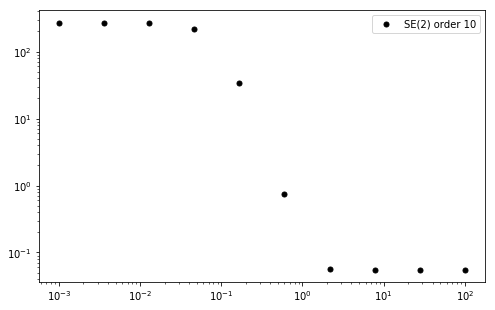

In [53]:
se2_ceff_vals_3 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, 2 * np.pi/3, 3, 'SE(2) order 10')
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, [se2_ceff_vals_3], ['SE(2) order 10'])

0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0


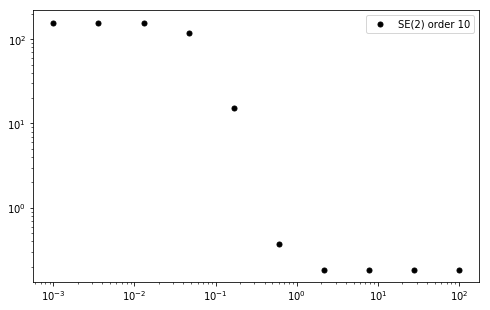

In [54]:
se2_ceff_vals_4 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, np.pi/2, 4, 'SE(2) order 10')
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, [se2_ceff_vals_4], ['SE(2) order 10'])

0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0


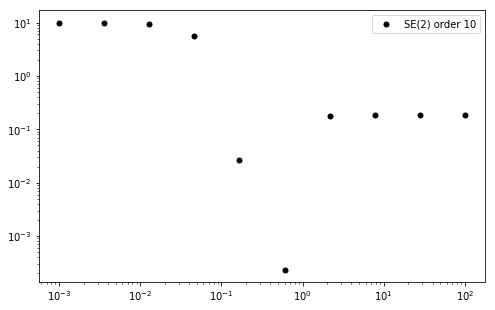

In [208]:
se2_ceff_vals_4_0 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, 0, 4, 'SE(2) order 10')
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, [se2_ceff_vals_4_0], ['SE(2) order 10'])

0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0


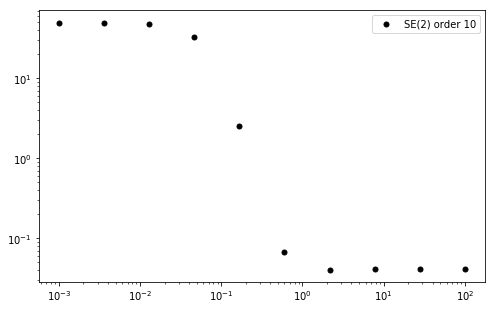

In [55]:
se2_ceff_vals_7 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, 2 * np.pi/7, 7, 'SE(2) order 10')
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, [se2_ceff_vals_7], ['SE(2) order 10'])

### Mining minima*

In [56]:
def mining_minima_explicit(sigma, n_links, cutoff=10000):
    if (n_links != 4):
        print("Explicit mining minima only implemented for 4 links")
        return 0

    theta_vals = 2 * np.pi * np.arange(-cutoff, cutoff)
    all_folded_gaussian_vals = np.exp(-theta_vals**2/(2 * sigma * sigma))
    Z = np.sum(all_folded_gaussian_vals)
    Z_unpaired = (Z/(math.sqrt(2 * np.pi) * sigma)) ** 4 # Z multiplied by normalization factor
    
    # Could instead approximate the Hessian numerically below
    dlogZ_dtheta2 = (1/Z) * (1/(sigma**2)) * (1 - np.sum(theta_vals**2 * all_folded_gaussian_vals)/(sigma**2))  
    if dlogZ_dtheta2 < 0:
        return 0 

    sigma_eff = 2/math.sqrt(dlogZ_dtheta2)
    Z_paired = math.sqrt(2 * np.pi) * sigma_eff * erf(np.pi/(math.sqrt(2) * sigma_eff)) 

    # Why are we multipying by Z_unpaired instead of dividing?
    # Not sure why I'm off by a factor of 4
    C_eff = 2 * np.pi * Z_unpaired * Z_paired/4
    return C_eff

In [140]:
# Gets energy of the configuration with the n_links-3 angles specified
# Finds the chain closure and uses this to calculate the energy 
# Chooses the closure solution that is closest to point_n2 (2nd to last point)

def get_energy_from_first_thetas(first_thetas, sigma, point_n2, theta_0, L):
    n_links = len(first_thetas) + 3 # not used?
    
    # Get x, y positions from first_thetas
    points = get_coords_from_thetas(first_thetas, L)
    
    # Get closure solutions and find the closure solution that is closest to the minimum
    [(x1, y1), (x2, y2)] = get_triangles(points[-1][0], points[-1][1], L)
    dist_1 = (point_n2[0] - x1[0])**2 + (point_n2[1] - y1[0])**2
    dist_2 = (point_n2[0] - x2[0])**2 + (point_n2[1] - y2[0])**2
    (x_n2, y_n2) = (x1[0], y1[0])
    if dist_2 < dist_1:
        (x_n2, y_n2) = (x2[0], y2[0])
    
    # Get angles for probability calculation
    thetas = np.copy(first_thetas)
    thetas = np.append(thetas,
                [np.pi - get_angle([points[-2][0], points[-2][1]], [points[-1][0], points[-1][1]], [x_n2, y_n2]),
                  np.pi - get_angle([points[-1][0], points[-1][1]], [x_n2, y_n2], [-L, 0]),
                  np.pi - get_angle([x_n2, y_n2], [-L, 0], [0, 0])])

    # Get Jacobian
    J = abs(get_J([[points[-1][0], points[-1][1]], [x_n2, y_n2], [-L, 0]]))

    # Compute energy
    ene = -math.log(np.prod(eval_folded_grid(sigma, thetas - theta_0))/J)
    
    return ene

In [175]:
# Gets energy of the configuration with one angle specified (this angle is repeated to close the chain)
# Returns the second-to-last points obtained by repeating the same angle n_links times
def get_energy_from_one_angle(theta, sigma, n_links, theta_0, L):
    if (n_links < 4):
        print("Cannot evaluate this function for n_links < 4")

    points = get_coords_from_thetas([theta]*n_links, L)
    
    Z = eval_folded(sigma, theta - theta_0)**n_links
    J = get_J(points[-4:-1])
    if (Z <= 0) or (J <= 1e-06):
        return [np.nan, points[-3]]
    ene = -math.log(Z/J)
    return [ene, points[-3]]

In [198]:
def mining_minima(sigma, theta_0, n_links, L=1, dtheta = 1e-5):

    # Minima have the form: all angles the same with all summing to 2*pi*k for integer k
    ceff = 0
    
    for i in range(n_links - 1):
        cur_angle = (i + 1) * 2 * np.pi/n_links
        first_thetas = np.array([cur_angle] * (n_links - 3))
        
        # Get energy of minimum and closure solution using get_energy_from_one_angle
        [ene, point_n2] = get_energy_from_one_angle(cur_angle, sigma, n_links, theta_0, L) 
        if np.isnan(ene):
            continue
        
        # Get Hessian: (f(x+dx, y+dy) - f(x+dx,y) - f(x,y+dy) + f(x,y))/(dx * dy)
        H = np.zeros((n_links - 3, n_links - 3))
        for ii in range(n_links - 3):
            for jj in range(n_links - 3):
                theta_dii = np.copy(first_thetas)
                theta_dii[ii] += dtheta
                ene_dii = get_energy_from_first_thetas(theta_dii, sigma, point_n2, theta_0, L)
                
                theta_djj = np.copy(first_thetas)
                theta_djj[jj] += dtheta
                ene_djj = get_energy_from_first_thetas(theta_djj, sigma, point_n2, theta_0, L)
                
                theta_dii_djj = np.copy(theta_dii)
                theta_dii_djj[jj] += dtheta
                ene_dii_djj = get_energy_from_first_thetas(theta_dii_djj, sigma, point_n2, theta_0, L)
                
                H[ii, jj] = (ene_dii_djj - ene_dii - ene_djj + ene)/(dtheta**2)
        
        # Get eigenvalue decomposition and check all eigenvalues positive
        w, _ = LA.eig(H)
        if np.sum(w < 0) > 0:
            continue
            
        # For each degree of freedom, add the contribution to Ceff
        cur_ceff = 2 * np.pi * math.exp(-ene)
        for ii in range(n_links - 3):
            sigma_eff = 2/math.sqrt(w[ii])
            cur_ceff *= (sigma_eff/2) * math.sqrt(2 * np.pi) * erf(math.sqrt(2) * np.pi/(sigma_eff))
        ceff += cur_ceff

    return ceff

0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0


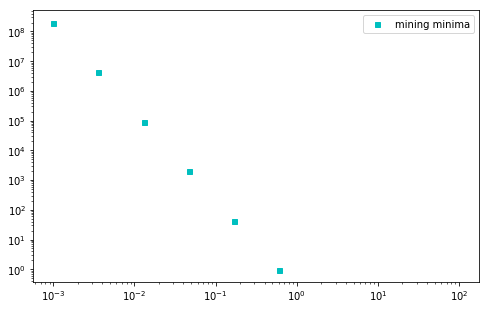

In [199]:
mining_minima_4 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, np.pi/2, 4, 'mining minima')
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, [mining_minima_4], ['mining minima'])

0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0


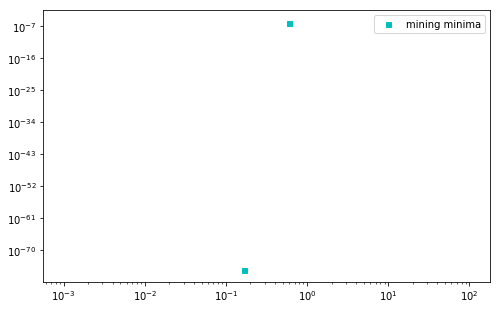

In [209]:
mining_minima_4_0 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, 0, 4, 'mining minima')
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, [mining_minima_4_0], ['mining minima'])

0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0


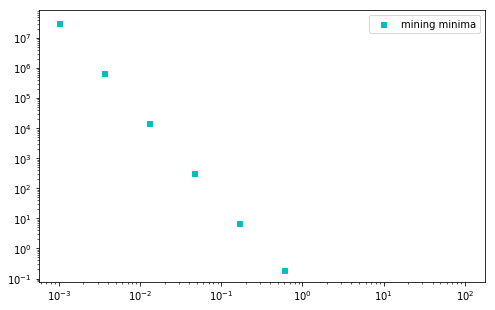

In [201]:
mining_minima_7 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, 2 * np.pi/7, 7, 'mining minima')
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, [mining_minima_7], ['mining minima'])

### Gaussian propagation

In [2]:
def gaussian_ceff(sigma, theta_0, n_links, L=1):
    start = np.array([[0, 0, 0], [0, 0, 0], [0, 0, sigma*sigma]]) # Covariance matrix
    rinv = np.array([[math.cos(theta_0), math.sin(theta_0), L*math.cos(theta_0)], \
        [-math.sin(theta_0), math.cos(theta_0), L*math.sin(theta_0)],[0, 0, 1]]) # Coordinate transform in SE2
    cur_mat = start
    for ii in range(n_links-1):
        cur_mat = np.matmul(np.matmul(rinv, cur_mat), rinv.transpose()) + start
    return 2 * np.pi/(math.sqrt(abs(np.linalg.det(cur_mat))) * (2 * np.pi)**(1.5))

0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0


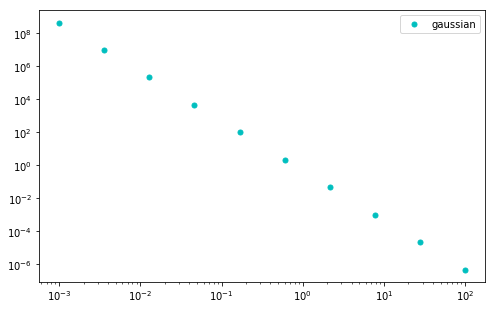

In [61]:
gaussian_ceff_3 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, 2 * np.pi/3, 3, 'gaussian')
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, [gaussian_ceff_3], ['gaussian'])

0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0


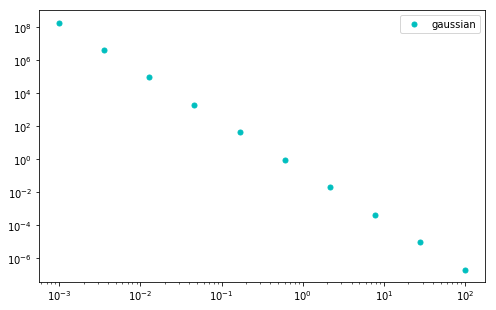

In [62]:
gaussian_ceff_4 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, np.pi/2, 4, 'gaussian')
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, [gaussian_ceff_4], ['gaussian'])

0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0


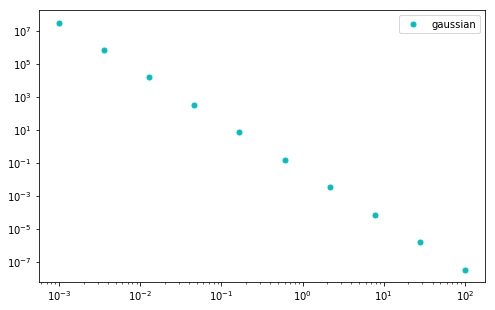

In [63]:
gaussian_ceff_7 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, 2 * np.pi/7, 7, 'gaussian')
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, [gaussian_ceff_7], ['gaussian'])

### Stochastic MC sampling*

In [64]:
def generate_for_samples(sigma, theta_0, nfor, L, niter):
    theta_totals = np.zeros(niter)
    x_totals = np.zeros(niter)
    y_totals = np.zeros(niter)
    for ii in range(nfor):
        theta_vals = np.random.normal(loc=theta_0, scale=sigma, size=niter)
        theta_totals += theta_vals
        theta_totals %= 2 * np.pi
        x_totals += L * np.cos(theta_totals)
        y_totals += L * np.sin(theta_totals)
    return [theta_totals, x_totals, y_totals]

In [65]:
def generate_rev_samples(sigma, theta_0, nrev, L, niter, add_noise=False):
    theta_rev_totals = np.zeros(niter)
    x_rev_totals = np.zeros(niter)
    y_rev_totals = np.zeros(niter)
    for ii in range(nrev):
        x_rev_totals -= L * np.cos(2 * np.pi - theta_rev_totals)
        if add_noise and nrev == 1:
            x_rev_totals += np.random.normal(loc=0, scale=0.001, size=niter)
        y_rev_totals -= L * np.sin(2 * np.pi - theta_rev_totals)
        if add_noise and nrev == 1:
            y_rev_totals += np.random.normal(loc=0, scale=0.001, size=niter)
        theta_vals = np.random.normal(loc=theta_0, scale=sigma, size=niter)
        theta_rev_totals += theta_vals
    theta_rev_totals = 2 * np.pi - theta_rev_totals
    theta_rev_totals %= 2 * np.pi
    return [theta_rev_totals, x_rev_totals, y_rev_totals]

In [66]:
def grid_ceff(sigma, theta_0, nfor, nrev, L=1, niter=100000, num_bins=400):
    # Generate forward samples
    [theta_totals, x_totals, y_totals] = generate_for_samples(sigma, theta_0, nfor, L, niter)

    # Generate reverse samples
    [theta_rev_totals, x_rev_totals, y_rev_totals] = generate_rev_samples(sigma, theta_0, nrev, L, niter)

    arr_data = np.concatenate(([theta_totals], [x_totals], [y_totals])).T
    rev_arr_data = np.concatenate(([theta_rev_totals], [x_rev_totals], [y_rev_totals])).T
    
    # Define x, y, theta bin dimensions for histogram
    del_theta = (2 * np.pi)/num_bins
    xmin = ymin = -2 * L
    xmax = ymax = 2 * L
    del_x = (xmax-xmin)/num_bins
    del_y = (ymax-ymin)/num_bins
    theta_bins = np.arange(0, 2 * np.pi, del_theta)
    x_bins = np.arange(xmin, xmax, del_x) - del_x/2
    y_bins = np.arange(ymin, ymax, del_y) - del_y/2

    # Assemble histogram using sampled values
    # density=True takes care of dividing by the total count and the bin volumes
    for_p_arr, _ = np.histogramdd(arr_data, bins=(theta_bins, x_bins, y_bins), density=True)
    rev_p_arr, _ = np.histogramdd(rev_arr_data, bins=(theta_bins, x_bins, y_bins), density=True)

    # Calculate the total probability of going forward and then backward
    for_rev_prod = np.multiply(for_p_arr, rev_p_arr)
    total = np.sum(for_rev_prod) * del_theta * del_x * del_y
    total *= 2 * np.pi
    return total

In [67]:
def grid_ceff_kde(sigma, theta_0, nfor, nrev, L=1, niter=1000, num_bins=400):
    # Generate forward samples
    [theta_totals, x_totals, y_totals] = generate_for_samples(sigma, theta_0, nfor, L, niter)

    # Generate reverse samples
    [theta_rev_totals, x_rev_totals, y_rev_totals] = generate_rev_samples(sigma, theta_0, nrev, L, niter, add_noise=True)

    arr_data = np.concatenate(([theta_totals], [x_totals], [y_totals]))
    rev_arr_data = np.concatenate(([theta_rev_totals], [x_rev_totals], [y_rev_totals]))

    # Use a Multivariable KDE to evaluate overlap
    for_kde = gaussian_kde(arr_data)
    rev_kde = gaussian_kde(rev_arr_data)

    # Calculate the total probability of going forward and then backward
    total = 2 * np.pi * for_kde.integrate_kde(rev_kde)    
    return total

In [68]:
grid1_ceff_3 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, 2 * np.pi/3, 3, 'grid1')
grid1_ceff_4 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, np.pi/2, 4, 'grid1')
grid2_ceff_4 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, np.pi/2, 4, 'grid2')
grid1_ceff_kde_3 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, 2 * np.pi/3, 3, 'grid1 kde')
grid1_ceff_kde_4 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, np.pi/2, 4, 'grid1 kde')
grid2_ceff_kde_4 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, np.pi/2, 4, 'grid2 kde')

0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0
0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0
0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0
0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0
0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0
0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.82559402207125

In [211]:
grid1_ceff_4_0 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, 0, 4, 'grid1')
grid2_ceff_4_0 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, 0, 4, 'grid2')
grid1_ceff_kde_4_0 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, 0, 4, 'grid1 kde')
grid2_ceff_kde_4_0 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, 0, 4, 'grid2 kde')

0.001


/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:1020: RuntimeWarning: invalid value encountered in true_divide
  hist /= s


0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0
0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0
0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0
0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0


In [69]:
grid1_ceff_7 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, 2 * np.pi/7, 7, 'grid1')
grid2_ceff_7 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, 2 * np.pi/7, 7, 'grid2')
grid1_ceff_kde_7 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, 2 * np.pi/7, 7, 'grid1 kde')
grid2_ceff_kde_7 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, 2 * np.pi/7, 7, 'grid2 kde')

0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0
0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0
0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0
0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0


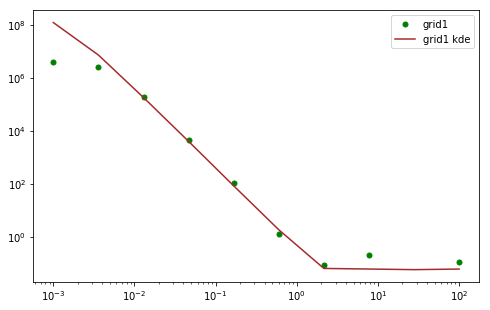

In [70]:
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, [grid1_ceff_3, grid1_ceff_kde_3], ['grid1', 'grid1 kde'])

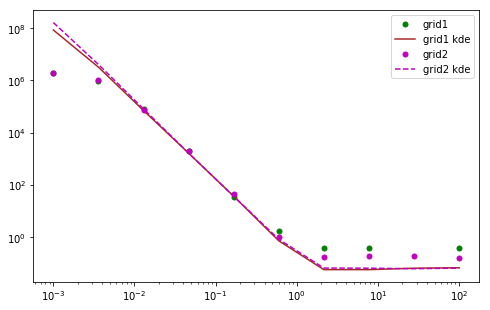

In [71]:
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, [grid1_ceff_4, grid1_ceff_kde_4, grid2_ceff_4, grid2_ceff_kde_4], 
           ['grid1', 'grid1 kde', 'grid2', 'grid2 kde'])

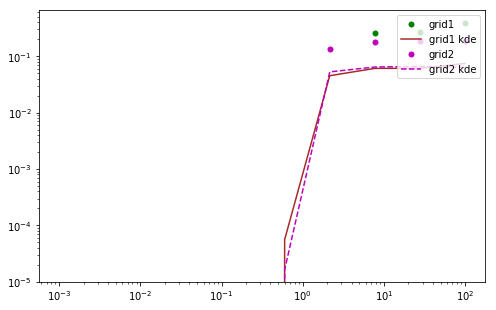

In [212]:
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, [grid1_ceff_4_0, grid1_ceff_kde_4_0, grid2_ceff_4_0, grid2_ceff_kde_4_0], 
           ['grid1', 'grid1 kde', 'grid2', 'grid2 kde'])

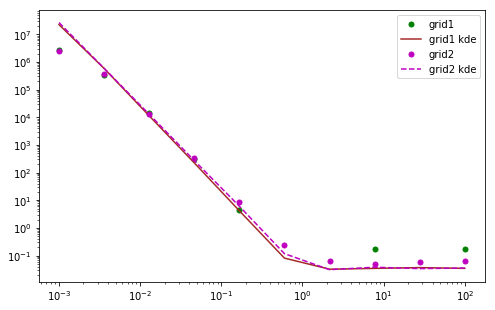

In [72]:
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, [grid1_ceff_7, grid1_ceff_kde_7, grid2_ceff_7, grid2_ceff_kde_7], 
           ['grid1', 'grid1 kde', 'grid2', 'grid2 kde'])

### Last Link 1*

In [73]:
def last_link_1(sigma, theta_0, n_links, L=1, niter=10000, num_bins=10000, 
    r_thresh=0.01, theta_thresh=0.01):
    del_theta = 2 * np.pi/num_bins 

    theta_prod = np.ones(niter)

    # Sample first links
    [theta_totals, x_totals, y_totals] = generate_for_samples(sigma, theta_0, n_links-1, L, niter)

    # Last link
    theta_vals = 2 * np.pi - theta_totals
    folded_vals = eval_folded_grid(sigma, theta_vals - theta_0)

    # Indicator for length pass
    r_pass = np.abs(L - np.sqrt(x_totals**2 + y_totals**2)) < r_thresh
    r_pass = r_pass.astype(int)
    
    # Indicator for angle pass
    phi_final = np.arctan2(x_totals * np.sin(theta_totals) - y_totals * np.cos(theta_totals), \
        - x_totals * np.cos(theta_totals) - y_totals * np.sin(theta_totals))
    phi_pass = np.abs(theta_vals - phi_final) < theta_thresh
    phi_pass = phi_pass.astype(int)

    prob = sum(r_pass * folded_vals * phi_pass)/niter
    return 2 * np.pi * prob/(np.pi * r_thresh * theta_thresh)

0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0


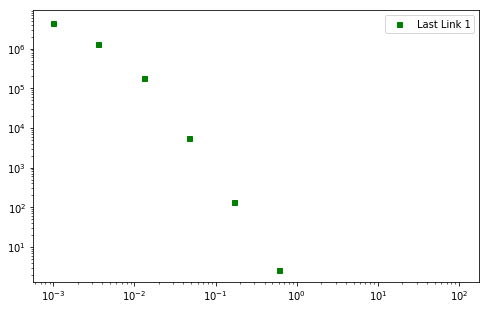

In [74]:
lastlink1_3 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, 2 * np.pi/3, 3, 'Last Link 1')
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, [lastlink1_3], ['Last Link 1'])

0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0


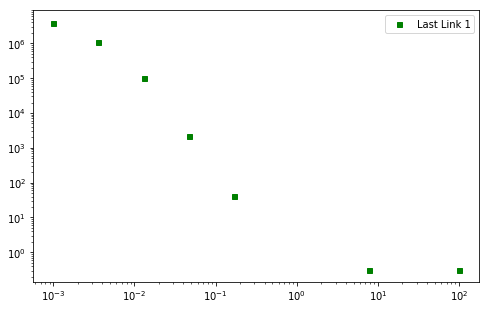

In [75]:
lastlink1_4 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, np.pi/2, 4, 'Last Link 1')
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, [lastlink1_4], ['Last Link 1'])

0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0


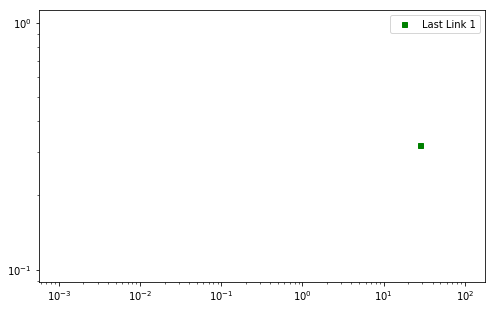

In [213]:
lastlink1_4_0 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, 0, 4, 'Last Link 1')
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, [lastlink1_4_0], ['Last Link 1'])

0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0


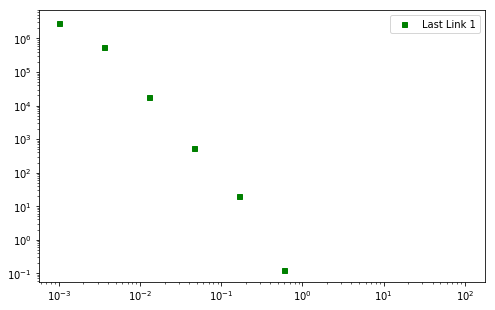

In [76]:
lastlink1_7 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, 2 * np.pi/7, 7, 'Last Link 1')
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, [lastlink1_7], ['Last Link 1'])

### Last Link 2*

In [77]:
def last_link_2_special(sigma, theta_0, n_links, L=1, niter=10000):
    if (n_links != 4):
        print("Cannot compute two last links' Ceff for nlinks not 4")
        return -1        
    
    # Get theta samples for one link
    theta_vals = np.random.normal(loc=theta_0, scale=sigma, size=niter)

    # For the one correct solution, calculate the area of the parallelopiped
    det_vals = np.abs(np.cos(theta_vals - theta_0))

    # Multiply by folded Gaussian values
    # Add all vals and multiply by 2 pi
    ceff = 2 * np.pi * np.sum(eval_folded_grid(sigma, theta_vals - theta_0)**3/det_vals)/niter
    return ceff

In [78]:
def generate_last_two_samples(sigma, theta_0, nfor, L, niter):
    theta_totals = np.zeros(niter)
    x_totals = np.zeros(niter)
    y_totals = np.zeros(niter)
    x_prev = np.zeros(niter)
    y_prev = np.zeros(niter)
    for ii in range(nfor):
        theta_vals = np.random.normal(loc=theta_0, scale=sigma, size=niter)
        theta_totals += theta_vals
        theta_totals %= 2 * np.pi
        x_prev = np.copy(x_totals)
        y_prev = np.copy(y_totals)
        x_totals += L * np.cos(theta_totals)
        y_totals += L * np.sin(theta_totals)
    return [theta_totals, x_totals, y_totals, x_prev, y_prev]

In [79]:
def last_link_2(sigma, theta_0, n_links, L=1, niter=10000):
    if (n_links < 4):
        print("Cannot compute two last links' Ceff for nlinks less than 4")
        return -1        
    
    # Get theta samples for one link
    [theta_totals, x_totals, y_totals, x_prev, y_prev] = \
        generate_last_two_samples(sigma, theta_0, n_links - 3, L, niter)
    
    # Get remaining points
    [(x1, y1), (x2, y2)] = get_triangles(x_totals, y_totals, L)
    
    # Get angles for probability calculation
    zeros = np.zeros(niter)
    angle1_1 = np.pi - get_angle([x_prev, y_prev], [x_totals, y_totals], [x1, y1])
    angle1_2 = np.pi - get_angle([x_prev, y_prev], [x_totals, y_totals], [x2, y2])
    angle2_1 = np.pi - get_angle([x_totals, y_totals], [x1, y1], [-L * np.ones(niter), zeros])
    angle2_2 = np.pi - get_angle([x_totals, y_totals], [x2, y2], [-L * np.ones(niter), zeros])
    angle3_1 = np.pi - get_angle([x1, y1], [-L * np.ones(niter), zeros], [zeros, zeros])
    angle3_2 = np.pi - get_angle([x2, y2], [-L * np.ones(niter), zeros], [zeros, zeros])

    # Vectorized determinant calculation 
    det_vals_1 = np.abs(get_J([[x_totals, y_totals], [x1, y1], [-L * np.ones(niter), zeros]]))
    det_vals_2 = np.abs(get_J([[x_totals, y_totals], [x2, y2], [-L * np.ones(niter), zeros]]))

    # Evaluate probability value with folded Gaussians
    soln_1 = np.nansum(eval_folded_grid(sigma, angle1_1 - theta_0) * \
                eval_folded_grid(sigma, angle2_1 - theta_0) * \
                eval_folded_grid(sigma, angle3_1 - theta_0)/det_vals_1)
    soln_2 = np.nansum(eval_folded_grid(sigma, angle1_2 - theta_0) * \
                eval_folded_grid(sigma, angle2_2 - theta_0) * \
                eval_folded_grid(sigma, angle3_2 - theta_0)/det_vals_2)

    # Add all vals and multiply by 2 pi
    ceff = 2 * np.pi * (soln_1 + soln_2)/niter
    return ceff

0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0


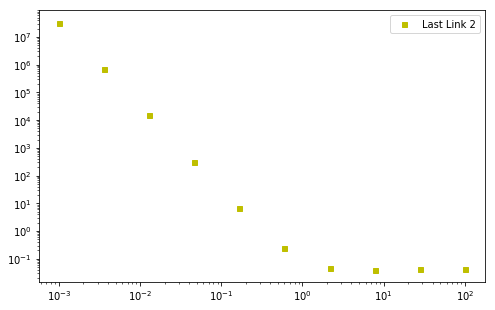

In [80]:
lastlink2_7 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, 2 * np.pi/7, 7, 'Last Link 2')
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, [lastlink2_7], ['Last Link 2'])

In [81]:
lastlink2_4 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, np.pi/2, 4, 'Last Link 2')

0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0


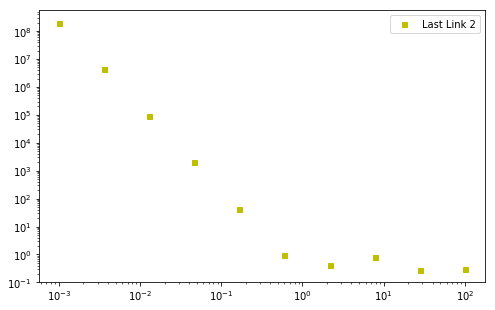

In [240]:
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, [lastlink2_4], ['Last Link 2'])

0.001
0.003593813663804626
0.01291549665014884
0.046415888336127795
0.1668100537200059
0.5994842503189409
2.1544346900318843
7.742636826811277
27.825594022071257
100.0


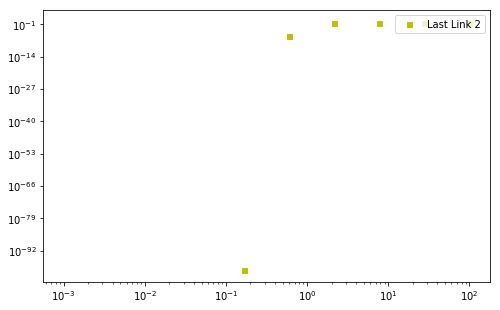

In [214]:
lastlink2_4_0 = eval_ceff_range(SIGMA_MIN, SIGMA_MAX, NUM_PTS, 0, 4, 'Last Link 2')
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, [lastlink2_4_0], ['Last Link 2'])

## Comparing Ceff methods

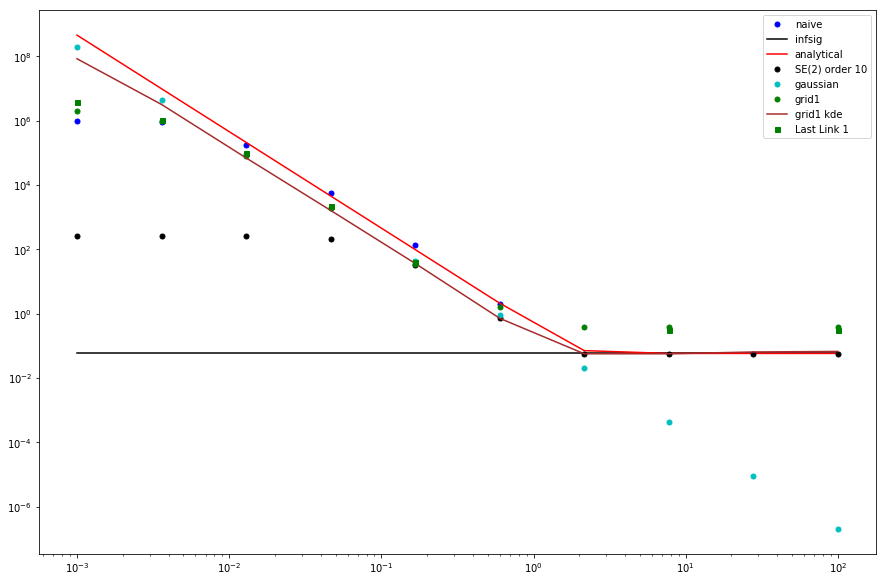

In [82]:
# Three links
ceff_lists_3 = [numerical_ceff_vals_3, analytical_inf_vals_3, analytical_vals_3, se2_ceff_vals_3, \
                gaussian_ceff_4, grid1_ceff_4, grid1_ceff_kde_4, lastlink1_4]
label_list_3 = ['naive', 'infsig', 'analytical', 'SE(2) order 10', 'gaussian',\
                'grid1', 'grid1 kde', 'Last Link 1']
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, ceff_lists_3, label_list_3, fig_size=(15, 10))

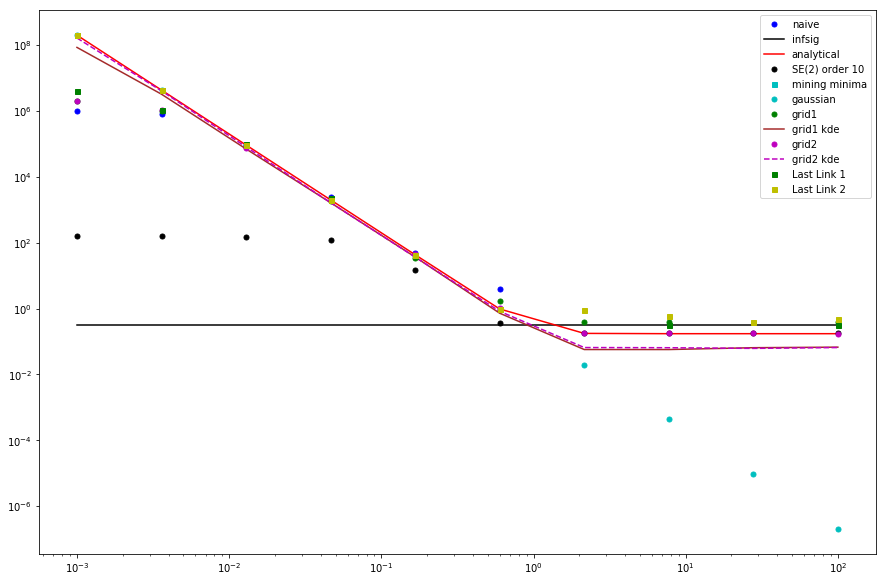

In [202]:
# Four links
ceff_lists_4 = [numerical_ceff_vals_4, analytical_inf_vals_4, analytical_vals_4, se2_ceff_vals_4, \
                mining_minima_4, gaussian_ceff_4, grid1_ceff_4, grid1_ceff_kde_4, grid2_ceff_4, \
                grid2_ceff_kde_4, lastlink1_4, lastlink2_4]
label_list_4 = ['naive', 'infsig', 'analytical', 'SE(2) order 10', 'mining minima', 'gaussian',\
                'grid1', 'grid1 kde', 'grid2', 'grid2 kde', 'Last Link 1', 'Last Link 2']
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, ceff_lists_4, label_list_4, fig_size=(15, 10))

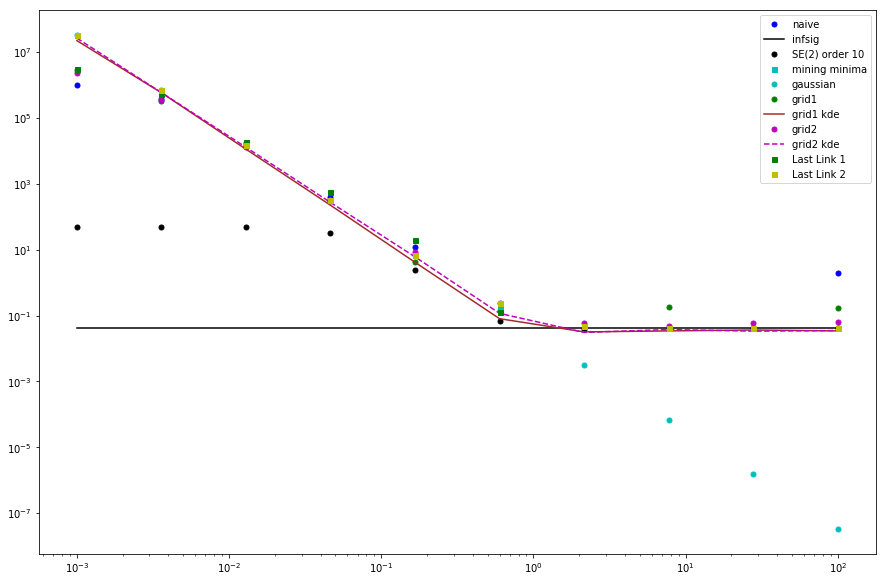

In [205]:
# Seven links
ceff_lists_7 = [numerical_ceff_vals_7, analytical_inf_vals_7, se2_ceff_vals_7, \
                mining_minima_7, gaussian_ceff_7, grid1_ceff_7, grid1_ceff_kde_7, grid2_ceff_7, \
                grid2_ceff_kde_7, lastlink1_7, lastlink2_7]
label_list_7 = ['naive', 'infsig', 'SE(2) order 10', 'mining minima', 'gaussian', \
                'grid1', 'grid1 kde', 'grid2', 'grid2 kde', 'Last Link 1', 'Last Link 2']
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, ceff_lists_7, label_list_7, fig_size=(15, 10))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in less


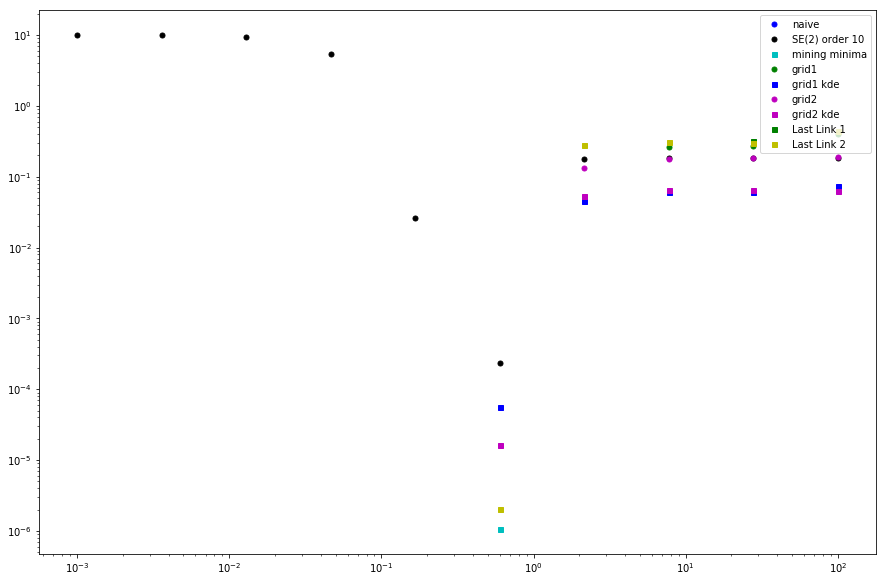

In [227]:
# Four links with theta_0 = 0
ceff_lists_4_0 = [numerical_ceff_vals_4_0, se2_ceff_vals_4_0, \
                mining_minima_4_0, grid1_ceff_4_0, grid1_ceff_kde_4_0, grid2_ceff_4_0, \
                grid2_ceff_kde_4_0, lastlink1_4_0, lastlink2_4_0]
label_list_4_0 = ['naive', 'SE(2) order 10', 'mining minima', \
                'grid1', 'grid1 kde', 'grid2', 'grid2 kde', 'Last Link 1', 'Last Link 2']
plot_ceffs(SIGMA_MIN, SIGMA_MAX, NUM_PTS, ceff_lists_4_0, label_list_4_0, fig_size=(15, 10), cutoff=-10)